# Perceptron Method

The Perceptron can be seen in a simple way as a parameterised function, which receives a real-valued vector **x** as input and gives a Boolean output, $1$ or $-1$, applying a linear function to the initial vector.  The parameters of this method are just the coefficients $w_i$ of the linear function.
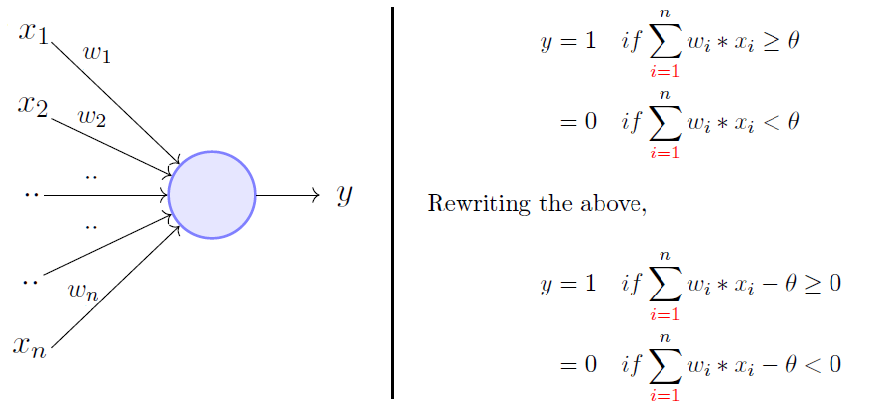




**Perceptron Convergence**




The Perceptron Learning Algorithm has as input a dataset of $n$ points $x^i$ and their associated labels $y^i$. For this algorithm to work, we must do two assumptions.

*Assumption 1 (Linear Separability):* There exists some $w^* \in \mathbb{R}$ such that, $||w^*||=1$ and it exists $\gamma >0$ such that $y^i(w^*x^i)>\gamma.$ 

*Assumption 2 (Bounded coordinates):* There exists $R\in \mathbb{R}$ such that for $i\in \{1,~.~.~.~,n\}$, $||x^i||\leq R.$ 

**Perceptron Learning Algorithm**

*$k=1$; $w_k=0$.*

*While there exists $i \in \{1,.~.~.~,n\}$ such that $y^i(w^k x^i)\leq 0:$

...Pick an arbitrary $j \in \{1,.~.~.~,n\}$ such that $y^j(w^k x^j)\leq 0$.*

*...$w_{k+1}=w_k+y^jx^j$.*

*...$k=k+1$.*

*Return $w_k$*


Now we have an idea of the method, let's prove convergence.

*Theorem:* The Perceptron Learning Algorithm makes at most $\frac{R^2}{\gamma^2}$ updates, and then it returns a separating hyperplane.

*Proof: * The code show us that the algorithm returns a weight vector that must separate the + points from the - points, therefore we just need to prove that the algorithm terminates after at most $\frac{R^2}{\gamma^2}$ updates, which means $k< \frac{R^2}{\gamma^2}$.

The code show us that $w^1=0$, and for $k\geq1$, if $x^j$ is the misclassified point during the iteration $k$, then 

$$w^{k+1} w^*=(w^k +y^jx^j)w^* = w^kw^* +y^j(x^j w^*) > w^k w^* + \gamma$$

due to *assumption 1*.
By induction we have that $w^{k+1} w^* > k \gamma$. We know that $||w^*||=1$, then $w^{k+1} w^* \leq ||w^{k+1}|| ~ ||w^*|| =||w^{k+1}||$, and we get 
$$||w^{k+1}||>k\gamma  ~~~~~~    (1)$$

On the other hand, 
$$||w^{k+1}||^2=\||w^k +y^jx^j||^2\\
=\ ||w^k||^2 + ||y^jx^j||^2 + 2(w^k x^j)y^j \\ 
= ||w^k||^2 + ||x^j||^2 + 2(w^k x^j)y^j \\ 
\leq ||w^k||^2 + ||x^j||^2\\
\leq ||w^k||^2 + R^2
$$

for *asumption 2*. By induction we have

$$||w^{k+1}||^2 \leq kR^2 ~~~~~~ (2)$$

Using (1) and (2) we have

$$k^2 \gamma^2 \leq  kR^2 ⟹ k< \frac{R^2}{\gamma^2}.$$

Now, let's define some functions to use perceptron 

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import math
from sklearn.preprocessing import normalize
from functools import partial


%matplotlib inline

In [ ]:
def flip_coins(total_coins):
    """Flip all coins once, return their head/tail status
    """
    
    hts = np.zeros(total_coins) #head: 1, tail: 0
    probs = np.random.uniform(size=total_coins)
    hts[probs > 0.5] = 1
    return hts

def run_once(total_coins, total_flips, print_freq = False):
    v1, vrand, vmin = None, None, None
    crand = np.random.choice(total_coins)
    hts_sum = np.zeros(total_coins) #sum of heads in total_flips
    
    for flip in range(total_flips):
        hts_sum = hts_sum + flip_coins(total_coins)
    
    hts_freq = hts_sum/total_flips #number of heads over number of flips
    
    v1 = hts_freq[0]
    vrand = hts_freq[crand]
    cmin = np.argmin(hts_sum)
    vmin = hts_freq[cmin]
    
    if print_freq:
        print('Frequency of first coin: {}'.format(v1))
        print('Frequency of a random coin: coin #{} with frequency {}'.format(crand, vrand))
        print('Frequency of the coin with minimum frequency: coin #{} with frequency {}'.format(cmin, vmin))
    return v1,vrand,vmin

# **Exercise 1.2**

Suppose that we use a perceptron to detect spam messages. Let's say that each email message is represented by the frequency of occurrence of keywords, and the output is if the message is considered spam.

(a) Can you think of some keywords that will end up with a large positive weight in the perceptron?

(b) How about keywords that will get a negative weight?

(c) What parameter in the perceptron directly affects how many borderline messages end up being classified as spam?

**Solution**

(a) A positive weight make reference to a spam message, that is why some keywords that can give a positive weight are free, money, publicity, discount, gift. 

(b) On the other hand there are may words that could get a negative weight as homework, meeting, work, job, business or company.

(c) If we remember the Perceptron method, it is 

$$sign(b+\sum_{i=1}^n w_i x_i),$$
where we can see that $w$, the weight, affects how many borderline messages end up being classified as spam.  

#**Exercise 1.3**

The weight update rule in (1.3)* has the nice interpretation that it moves in the direction of classifying $x(t)$ correctly.

(a) Show that $y(t)w^T(t)x(t)<0$. [Hint: $x(t)$ is misclassified by $w(t)$]
.

(b) Show that $y(t)w^T(t+1)x(t)>y(t)w^T(t)x(t).$ [Hint: Use (1.3).]

(c) As far as classifying $x(t)$
 is concerned, argue that the move from $w(t)$
 to $w(t+1)$
 is a move 'in the right direction'.

[The (1.3) mentioned in the question is the update rule for perceptron learning algorithm ( PLA ), which is $w(t+1)=w(t)+y(t)x(t)$]

**Solution**

(a) We have
$$h(x)=sign(w^Tx)=\left\lbrace\begin{array}{c}1, w^Tx>0 \\-1, w^Tx<0 \end{array}\right.$$

If $x(t)$ is misclassified by $w(t)$, $h(x)$ and the label $y(t)$ will have opposite values. 

Thus, 
$$y(t)h(x)=y(t)sign(w^T(t)x(t))=-1$$  
which means
$$y(t)w^T(t)x(t) < 0$$

(b) Using (1.3) we have that 
$$y(t)w^T(t+1)x(t)=y(t)(w^T(t)+y(t)x(t))x(t)= y(t)w^T(t)x(t)+y^2(t)x^2(t)$$ 
and $$y^2(t)x^2(t)\geq  0.$$
Adittionally, $y(t) \in \{-1, 1\}$ and $x_0=1$, then 
$$y^2(t)x^2(t)>  0,$$
therefore 
$$y(t)w^T(t+1)x(t) > y(t)w^T(t)x(t). $$

(c) If the classification of $w(t)$ is wrong, then $y(t)w^T(t)x(t) < 0$, but by (b) we know that

$$y(t)w^T(t+1)x(t) > y(t)w^T(t)x(t),$$

this produces that $y(t)w^T(t+1)x(t)$ is closer to be positive, which means $w(t+1)$ is going to be a little be closer to $x(t)$, until $x(t)$ will be classified correctly by some $w(t'+1).$

#**exercise 1.10**

Here is an experiment that illustrates the difference between a single bin 
and multiple bins. Run a computer simulation for flipping 1000 fair coins. 
Flip each coin independently times. Let's focus on 3 coins as follows:  

*   $c_1$ is the first coin flipped
*   $C_{rand}$ is a coin you choose at random
*   $C_{min}$ is the 
coin that had the minimum frequency of heads (pick the earlier one in case 
of a tie)

Let $\nu_1$ , $\nu_{rand}$ and $\nu_{min}$ be the fraction of heads you obtain for the 
respective three coins. 

(a) What is $\mu$ for the three coins selected?

(b)  Repeat this entire experiment a large number of times (e.g. , 100.000 
runs of the entire experiment) to get several instances of $\nu_1$ , $\nu_{rand}$ 
and $\nu_{min}$ and plot the histograms of the distributions of $\nu_1$ , $\nu_{rand}$ and $\nu_{min}$· Notice that which coins end up being $C_{rand}$ and $C_{min}$ may differ from one run to another. 

(c) Using (b), plot estimates for $\mathbb{P}[|\nu-\mu| > \epsilon]$ as a function of $\epsilon$, together 
with the Hoeffding bound $2e^{-2\epsilon^2N}$ (on the same graph).

(d) Which coins obey the Hoeffding bound, and which ones do not? Explain why. 

(e) Relate part (d) to the multiple bins in Figure 1. 10. 

**Solution**

(b) As the three coins are fair, $\mu$ must be 0.5. Let's see.

In [ ]:
total_coins = 1000
total_flips = 10
run_once(total_coins, total_flips, True)

Frequency of first coin: 0.5
Frequency of a random coin: coin #118 with frequency 0.4
Frequency of the coin with minimum frequency: coin #597 with frequency 0.0


(0.5, 0.4, 0.0)

(b) Now, let's repeat the experiment 1.000.000 times.

(array([6.23887e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        3.76090e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.30000e+01]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ]),
 <BarContainer object of 10 artists>)

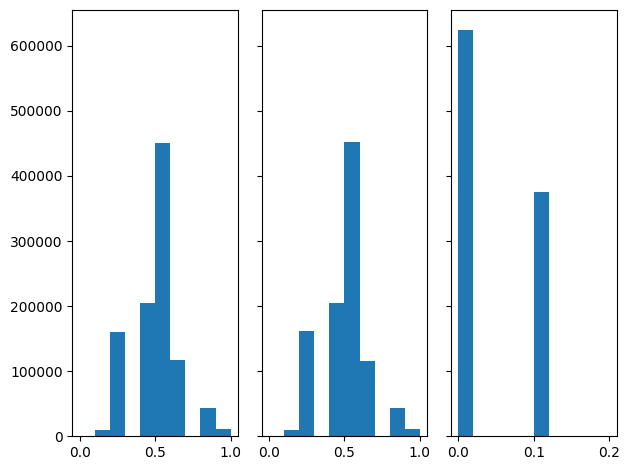

In [ ]:
total_coins = 1000
total_flips = 10
total_runs = 1000000
v1s, vrands, vmins = [],[],[]   #Matrix with the 3 frequencies of all the experiments

for r in range(total_runs):
    v1,vrand,vmin = run_once(total_coins, total_flips)
    v1s.append(v1)  
    vrands.append(vrand)
    vmins.append(vmin)

fig, axs = plt.subplots(1,3,sharey=True, tight_layout=True)
n_bins = 10
axs[0].hist(v1s,bins=n_bins)
axs[1].hist(vrands,bins=n_bins)
axs[2].hist(vmins,bins=n_bins)

(c) Next, we are going to study the two bounds:
* Bound 1: $\mathbb{P}[|\nu-\mu| > \epsilon]$, as a function of $\epsilon$.
* Bound 2: Hoeffding bound.

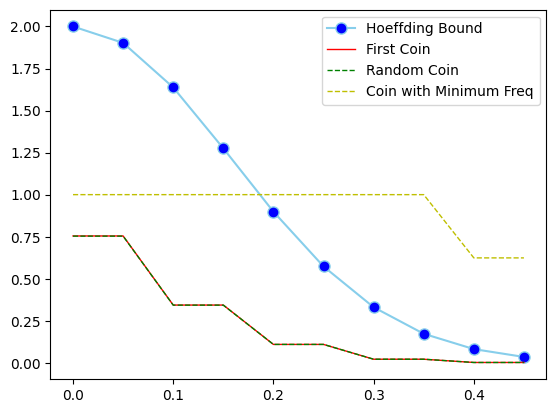

In [ ]:
#Hoeffding bound
def hoeffding_bound(eps, n):
    return 2.0*np.exp(-2.0*n*eps**2)

#We are going to try with E=0, 0.5 and 0.05
eps = np.arange(0.0,0.5,0.05)
bound1 = hoeffding_bound(eps, total_flips)

v1s, vrands, vmins = np.array(v1s), np.array(vrands), np.array(vmins)

v1d = np.abs(v1s-0.5)
vrandd = np.abs(vrands-0.5)
vmind = np.abs(vmins-0.5)

#Bound 2 for the three coins
b1, brand, bmin = np.zeros(len(eps)),np.zeros(len(eps)),np.zeros(len(eps))

#Define bound
for i in range(eps.shape[0]):
    ep = eps[i]
    b1[i] = np.sum(v1d > ep)/total_runs
    brand[i] = np.sum(vrandd > ep)/total_runs
    bmin[i] = np.sum(vmind > ep)/total_runs

#plt.ylim((0,0.01))    
plt.plot(eps, bound1, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', label='Hoeffding Bound')
plt.plot(eps, b1, marker='', color='r', linewidth=1, label='First Coin')
plt.plot(eps, brand, marker='', color='g', linewidth=1, linestyle='dashed', label='Random Coin')
plt.plot(eps, bmin, marker='', color='y', linewidth=1, linestyle='dashed', label='Coin with Minimum Freq')
plt.legend()

(d) As we can see in the previous graphic, the first and the random coin obey the Hoeffding bound, while the coin with minimum frequency doesn't follow this bound. The reason why this happens is that one of the conditions of the Hoeffding bound is that the sample has to be randomly chosen from the options. This is fulfilled with the first two coins, that are chosen before the experiment, but for the last one, first we flip all the coins and compute out which one has the minimum frequency of heads. 

(e) With the first two coins, we are choosing them before the experiment, which is choosing bin beforehand, nevertheless, with the coin with minimum frequency of heads, we are choosing the bin from 1000 bins AFTER we finish sampling the data, that is similar to the learnning algorithm for the final hypothesis.  

#**exercise 1.11**

We are given a data set $D$ of 25 training examples from an unknown target 
function $f:X \rightarrow Y$, where $X=\mathbb{R}$ and $Y= {-1,+1}$. To learn $f$, we use 
a simple hypothesis set $H= {h_1
, h_2}$ where $h_1$ is the constant $+1$ function and $h_2$ is the constant $-1$.

We consider two learning algorithms, $S$ (smart) and $C$ (crazy). $S$ chooses 
the hypothesis that agrees the most with $D$ and $C$ chooses the other hypothesis deliberately. Let us see how these a lgorithms perform out of sample from the deterministic and probabilistic points of view. Assume in the probabilistic view that there is a probabil ity distribution on $X$, and let 
$\mathbb{P}[f(x)=+1]= p$.

(a) Can $S$ produce a hypothesis that is guaranteed to perform better than 
random on any point outside $D$?

(b) Assume for the rest of the exercise that all the examples in $D$ have 
$y_n =+1$. Is it possible that the hypothesis that $C$ produces turns out 
to be better than the hypothesis that $S$ produces?

(c) If $p = 0.9$, what is the probability that $S$ will produce a better hypothesis than $C$?

(d) Is there any value of $p$ for which it is more likely than not that $C$ will 
produce a better hypothesis than $S$?

**Solution**

(a) Let's think in the case where $f$ has 25 $+1$ on $D$ but on all other points of $X$ it has $-1$, in the case $S$ will chose the hypothesis $h_1$, which will not match $f$ outside of $D$ at all. On the other hand, a random function will have a 50/50 between $+1$ and $-1$, so it will match $f$ half of time. In this case we can see that the random funtion is better than $S$, that is why $S$ can not produce a hypothesis that is guaranteed to perform better than random on any point outside $D$.

(b) Yes, it is possible that $C$ produces turns out 
to be better than the hypothesis that $S$ produces, for example, if $f(x)=+1$ for every $x\in \mathbb{R}$, then $C$ will be better than $C$.

(c) If $\mathbb{P}[f(x)=+1]= p=0.9$, as every point in $D$ has $1$, $S$ will chose $h_1$ and $C$ will chose $h_2$. Then, outside of $D$, $h_1$ will have $90\%$ of probability to match with $f$, and $h_2$ will have only a $10\%$. Therefore, $S$ will always produce a better hypothesis than $C$. 

(d) From part (c), we can see that when $p<0.5$, $C$ will produce a better hypothesis, because $C$ will chose $h_2$, that will have more than $50\%$ chance to match with $f$ when $p<0.5$.

#**exercise 1.12**

A friend comes to you with a learning problem. She says the target function $f$ is completely unknown, but she has $4000$ data points. She is 
willing to pay you to solve her problem and produce for her a $g$ which 
approximates 
$f$. What is the best that you can promise her among the 
following: 

(a) After learning you will provide her with a $g$ that you will guarantee 
approximates $f$ well out of sample. 

(b) After learning you will provide her with a $g$, and with high probability 
the $g$ which you produce will approximate $f$ well out of sample. 

(c) One of two things will happen. 




*   You will produce a hypothesis g
*   You will declare that you failed

If you do return a hypothesis g, then with high probability the $g$ which 
you produce will approximate $f$ well out of sample. 

**Solution**

The best I can promise her is option (c):

The first scenery is that the unknown target $f$ is very complex that we can't learn from it or that I can't make it learn. The other option is that we can learn and produce a hypotesis $g$ that matches $f$ with a high probability, this is due to the Hoeffding inequality and the fact that we have many data points (4000). 

# References



*   Shivaram Kalyanakrishnan (2017). *The Perceptron Learning Algorithm and its Convergence*.
*   Michael Collins (2012). *Convergence proof for the perceptron algorithm*.
* Neil Z. (2020). *Learning-From-Data-A-Short-Course*. Source: https://github.com/niuers/Learning-From-Data-A-Short-Course/blob/master/Solutions%20to%20Chapter%201%20The%20Learning%20Problem.ipynb





